In [2]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv('E:\VIL Confidential Information Dataset\Train_imputed.csv')

In [4]:
test = pd.read_csv('E:\VIL Confidential Information Dataset\Test_imputed.csv')

In [5]:
test = test.iloc[:,1:].values

In [6]:
test.shape

(48242, 16)

In [22]:
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# train = sc_X.fit_transform(train)

In [23]:
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt
# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters = i, init = 'k-means++')
#     kmeans.fit(train)
#     wcss.append(kmeans.inertia_)
# plt.plot(range(1, 11), wcss)
# plt.title('The Elbow Method')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

In [24]:
test = pd.DataFrame(test)
tess = test.sample(n=2000)

In [25]:
tess

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
7688,4,4,7,0,1,1,2,1,2,0,8,1,87,4,0,0
42714,2,1,1,1,2,1,6,1,3,0,6,1,87,1,1,0
33526,1,1,2,1,3,1,6,0,3,0,0,1,87,1,1,0
8746,9,4,7,0,1,1,0,1,3,0,1,0,87,8,0,1
47198,2,1,2,1,2,1,7,1,2,0,0,4,23,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15842,0,5,1,0,1,1,2,1,2,0,1,2,106,8,0,0
10591,4,7,5,0,1,1,0,1,2,0,1,0,87,0,0,0
14883,2,4,1,1,3,0,7,1,2,0,4,1,87,7,2,0
14245,9,4,4,0,1,1,6,0,2,0,3,0,29,4,0,0


In [26]:
import random
for i in range(2000):
    for j in range(16):
        tess.iloc[i][j] += tess.iloc[i][j]*100 + random.randint(-10, 10)

In [27]:
tess

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
7688,411,411,700,-4,97,106,206,110,193,8,815,109,8791,402,-4,8
42714,197,96,111,98,193,102,598,91,297,1,602,106,8777,96,93,-6
33526,97,100,199,102,304,91,609,10,308,5,5,104,8794,93,96,0
8746,909,406,702,8,104,97,-9,108,293,-2,109,-1,8780,815,-5,93
47198,198,111,210,97,194,107,707,101,199,6,-8,395,2316,499,92,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15842,-6,505,103,-4,109,94,208,97,197,-9,104,208,10701,810,-2,1
10591,405,700,496,2,93,102,-8,98,198,-7,100,6,8779,4,-7,-6
14883,211,402,100,93,308,0,704,104,197,0,410,91,8793,700,206,10
14245,899,406,410,5,107,106,597,2,202,-6,310,-8,2927,400,-8,4


In [344]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(tess)

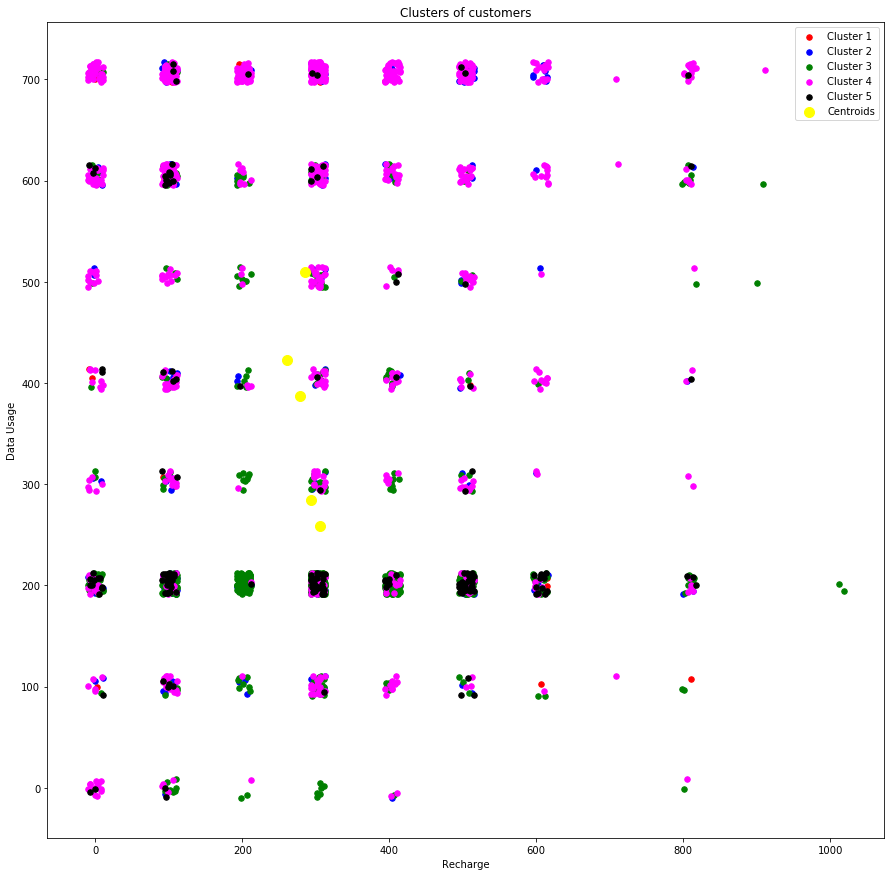

In [345]:
tess = tess.iloc[:,:].values
fig=plt.figure(figsize=(15, 15))
plt.scatter(tess[y_kmeans == 0, 10], tess[y_kmeans == 0, 6], s = 30, c = 'red', label = 'Cluster 1')
plt.scatter(tess[y_kmeans == 1, 10], tess[y_kmeans == 1, 6], s = 30, c = 'blue', label = 'Cluster 2')
plt.scatter(tess[y_kmeans == 2, 10], tess[y_kmeans == 2, 6], s = 30, c = 'green', label = 'Cluster 3')
plt.scatter(tess[y_kmeans == 3, 10], tess[y_kmeans == 3, 6], s = 30, c = 'magenta', label = 'Cluster 4')
plt.scatter(tess[y_kmeans == 4, 10], tess[y_kmeans == 4, 6], s = 30, c = 'black', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 10], kmeans.cluster_centers_[:, 6], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Recharge')
plt.ylabel('Data Usage')
plt.legend()
plt.show()

In [28]:
from kmodes.kmodes import KModes

In [16]:
km = KModes(n_clusters=5, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(test)

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 15216, cost: 273968.0
Run 1, iteration: 2/100, moves: 930, cost: 273968.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 15580, cost: 280036.0
Run 2, iteration: 2/100, moves: 938, cost: 280036.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 15189, cost: 265066.0
Run 3, iteration: 2/100, moves: 1266, cost: 265066.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 20165, cost: 271482.0
Run 4, iteration: 2/100, moves: 3114, cost: 271482.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 11587, cost: 279185.0
Run 5, iteration: 2/100, moves: 969, cost: 279185.0
Best run was number 3
[[ 9  7  7  0  0  1  2  1  3  0  3  1 87  8  0

In [34]:
km = KModes(n_clusters=5, init='Huang', n_init=5, verbose=0)
clusters = km.fit_predict(x)
test['clusters'] = clusters


import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(2)

# Turn the dummified df into two columns with PCA
plot_columns = pca.fit_transform(test.ix[:,0:12])

# Plot based on the two dimensions, and shade by cluster label
plt.scatter(plot_columns[:,1], plot_columns[:,0], c=test["clusters"], s=30)
plt.show()

NameError: name 'x' is not defined

In [36]:
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation
def doAgglomerative(X):
    model = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
    clust_labels1 = model.fit_predict(X)
    return (clust_labels1)

clust_labels1 = doAgglomerative(test)
agglomerative = pd.DataFrame(clust_labels1)
test.insert((test.shape[1]),'agglomerative',agglomerative)

MemoryError: unable to allocate array data.

In [1]:
from fcmeans import FCM

In [15]:
import matplotlib.pyplot as plt
fcm = FCM(n_clusters=5)
fcm.fit(test)

# outputs
fcm_centers = fcm.centers
fcm_labels  = fcm.u.argmax(axis=1)

In [17]:
plot(clust,v1v2=c(1,5))
## Scatter plot of Calories vs Cholesterol (mg) using gray levels for the clusters
plot(clust,v1v2=c(1,5),colclus=gray.colors(6))
## Scatter plot of Calories vs Cholesterol (mg)
## coloring in black objects with maximal membership degree lower than 0.5
plot(clust,v1v2=c(1,5),umin=0.5)
## Scatter plot of Calories vs Cholesterol (mg)
## coloring in black objects with maximal membership degree lower than 0.5
## and magnifying the points according to the maximal membership degree
plot(clust,v1v2=c(1,5),umin=0.5,ucex=TRUE)
## Scatter plot using the first two principal components and
## coloring in black objects with maximal membership degree lower than 0.3
plot(clust,v1v2=1:2,umin=0.3,pca=TRUE)

SyntaxError: invalid syntax (<ipython-input-17-e92b30593416>, line 13)